In [ ]:
# tqdm version 4.36.1 is required


!pip install --upgrade tqdm #for visualising progress bar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.api import DTypePolicy
from keras.api import FloatDTypePolicy
from keras.api import Function
from keras.api import Initializer
from keras.api import Input
from keras.api import InputSpec
from keras.api import KerasTensor
from keras.api import Layer
from keras.api import Loss
from keras.api import Metric
from keras.api import Model
from keras.api import Operation
from keras.api import Optimizer
from keras.api import Quantizer
from keras.api import Regularizer
from keras.api import Sequential
from keras.api import StatelessScope
from keras.api import Variable
from keras.api import __version__
from keras.api import activations
from keras.api import applications
from keras.api import backend
from keras.api import callbacks
from keras.api import config
from keras.api import constraints
from keras.api import datasets
from keras.api import device
from keras.api import distribution
from keras.api import dtype_policies
from keras.api import export
from keras.api import initializers
from keras.api import layers
from keras.api import legacy
from keras.api import losses
from keras.api import metrics
from keras.api import mixed_precision
from keras.api import models
from keras.api import name_scope
from keras.api import ops
from keras.api import optimizers
from keras.api import preprocessing
from keras.api import quantizers
from keras.api import random
from keras.api import regularizers
from keras.api import saving
from keras.api import tree
from keras.api import utils
from keras.api import version

In [ ]:
!pip install keras-preprocessing

# Importing Libaries
import numpy as np
import pandas as pd
import re #The re library in Python provides support for regular expressions, which are powerful tools for searching, matching, and manipulating strings based on specific patterns. Regular expressions are often used for tasks like validating input, searching for substrings, and replacing text.
import glob #This function returns a list of path names that match a given pattern.
from bs4 import BeautifulSoup #Beautiful Soup is a library that makes it easy to scrape information from web pages.
from keras_preprocessing.text import Tokenizer # Import from keras_preprocessing , The Tokenizer class from keras_preprocessing.text is used to convert text into a numerical representation. It tokenizes the input text, which means it breaks it into individual words or tokens and assigns a unique integer index to each token.
from keras.preprocessing.sequence import pad_sequences #The pad_sequences function is used to ensure that all sequences in a list have the same length by padding shorter sequences with zeros (or any other specified value).
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping #It helps in preventing overfitting by stopping the training process once the model's performance on a validation set no longer improves.
from tensorflow.keras.models import load_model
import keras #Keras is a high-level neural networks API that runs on top of TensorFlow. It is used for building and training neural network models in a user-friendly manner.
import warnings
import nltk
nltk.download('stopwords')
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.3 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Progress bar


from tqdm import tqdm



# Reading Pickle'd file which has data stored in a dataframe
# with headings: "text", "filenames", "highlights", "body"


data = pd.read_pickle("/content/drive/MyDrive/papers.pkl")


In [ ]:
import pandas as pd

# Load the pickled file
data = pd.read_pickle("/content/drive/MyDrive/papers.pkl")

# Display the first few rows of the DataFrame
print(data.head())

# Display the column names
print(data.columns)


                                                                                                                                                                                                        text  \
27    MAIN-TITLE An evolutionary approach to solve a system of multiple interrelated agent problems   HIGHLIGHTS                                                                                         ...   
196   MAIN-TITLE Optimal design of a 3D-printed scaffold using intelligent evolutionary algorithms   HIGHLIGHTS                                                                                          ...   
219   MAIN-TITLE Global optimization of open pit mining complexes with uncertainty   HIGHLIGHTS                                                                                                          ...   
286   MAIN-TITLE Quantitative prediction of peptide binding affinity by using hybrid fuzzy support vector regression   HIGHLIGHTS                                       

In [ ]:
!pip install --upgrade pandas

import pandas as pd

# Load the pickled file
data = pd.read_pickle("/content/drive/MyDrive/papers.pkl")

# Save the DataFrame to a CSV file
data.to_csv("/content/drive/MyDrive/papers.csv", index=False)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 77.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
# Preprocessing "body" text


from spacy.lang.en.stop_words import STOP_WORDS

def clean_body(text):
    newText = text.lower()
    newText = re.sub('[^\w\s\d\.]','',newText)
    newText = ' '.join(newText.split())
    tokens = [w for w in newText.split() if not w in STOP_WORDS]
    long_words=[]
    for i in tokens:
        if len(i)>=3:
            long_words.append(i)
    return (" ".join(long_words)).strip()

cleaned_body = []
for t in data['body']:
    cleaned_body.append(clean_body(t))

cleaned_body[:5]

['deterministic approaches simultaneously solve different interrelated optimisation problems lead general class nonlinear complementarity problem ncp. differentiability convexity requirements problems sophisticated algorithms introduced literature. paper develops evolutionary algorithm solve ncps. proposed approach parallel search multiple populations representing different agents evolve simultaneously whilst contact other. context agent autonomously solves optimisation programme sharing decisions neighbouring agents affects actions. framework applied environmental aerospace application obtained results compared found literature. convergence scalability approach tested search algorithm performance analysed. results encourage application evolutionary based algorithm complementarity problems future work investigate development performance improvements. study class problems solutions interrelated optimisation problems simultaneously required. context agent solves optimisation problem seek

In [ ]:
# Preprocessing "highlight" text


def clean_highlight(text):
  newText = text.lower()
  newText = re.sub('[^\w\s\d\.]','',newText)
  newText = ' '.join(newText.split())
  newText = '_START_ '+ newText + ' _END_'
  return newText

cleaned_highlight = []
for t in data['highlights']:
    cleaned_highlight.append(clean_highlight(t))

cleaned_highlight[:5]

['_START_ we develop an evolutionary approach to solve interrelated optimisation problems. multiple agents autonomously deal with their own problems and react to the others. test problems in water pollution and aerospace modelling demonstrate the algorithm. experiments on scalability and convergence of the algorithm show promising results. _END_',
 '_START_ the aggregated artificial neural network was used to investigate the simultaneous effects of printing parameters on the compressive strength and porosity of scaffolds. particle swarm optimization algorithm was implemented to obtain the optimum topology of the aann. pareto front optimization was used to determine the optimal setting parameters. the presented results and discussion can give informative information to practitioners who want to design a porous structure and need to know the impact of influential design parameters. _END_',
 '_START_ a stochastic global optimization framework for open pit mining complexes is proposed. the

In [ ]:
# Storing preprocessed data in the dataframe


data['cleaned_highlights'] = cleaned_highlight
data['cleaned_body'] = cleaned_body


In [ ]:
#Retriving 5000 papers from the dataframe as more computational power is needed for the entire 8k data.


data = data[:5000]


data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 27 to 6950
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   text                5000 non-null   object
 1   filenames           5000 non-null   object
 2   highlights          5000 non-null   object
 3   body                5000 non-null   object
 4   cleaned_highlights  5000 non-null   object
 5   cleaned_body        5000 non-null   object
dtypes: object(6)
memory usage: 273.4+ KB


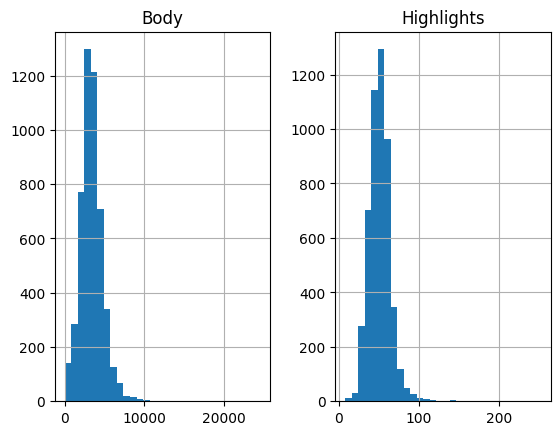

In [ ]:
#Visualizing the document length distribution for "body" and "highlights" to estimate optimal maximum length to create equal length vectors for words.


import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

for i in data['cleaned_body']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_highlights']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'Body':text_word_count, 'Highlights':summary_word_count})
length_df.hist(bins = 30)
plt.show()

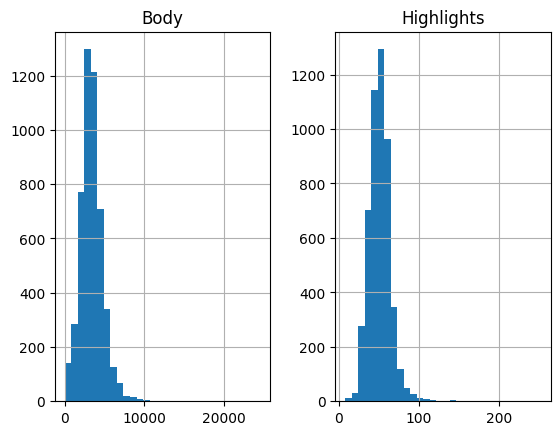

In [ ]:
#Visualizing the document length distribution for "body" and "highlights" to estimate optimal maximum length to create equal length vectors for words.

!pip install matplotlib # Install matplotlib library
import matplotlib.pyplot as plt # Import matplotlib

text_word_count = []
summary_word_count = []

for i in data['cleaned_body']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_highlights']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'Body':text_word_count, 'Highlights':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [ ]:
# Splitting data into training and test sets
# Test set is 20% of total data


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data['cleaned_body'],data['cleaned_highlights'],test_size=0.2,random_state=0,shuffle=True)


In [ ]:
#Tokenizer class from Keras is used to create equal length vectors for each word.

# Assuming you want to set max_len_body based on the visualization
max_len_body = 3000 # Replace 3000 with the value you deem appropriate

# Tokenizing "body"
x_tok = Tokenizer()
# Fit on the original text data, before converting to sequences
x_tok.fit_on_texts(list(data['cleaned_body'])) # Fit on the original text data

# Converting text to number sequences
x_train = x_tok.texts_to_sequences(x_train)
x_test = x_tok.texts_to_sequences(x_test)

# Padding zero upto maximum length
x_train = pad_sequences(x_train,  maxlen=max_len_body, padding='post')
x_test = pad_sequences(x_test, maxlen=max_len_body, padding='post')

# Total number of words
x_vocab_size = len(x_tok.word_index) +1


# Tokenizing "highlights"
# Assuming you also want to set max_len_highlight
max_len_highlight = 100 # Replace 100 with the value you deem appropriate

y_tok = Tokenizer()
# Fit on the original text data, before converting to sequences
y_tok.fit_on_texts(list(data['cleaned_highlights'])) # Fit on the original text data

# Converting text to number sequences
y_train = y_tok.texts_to_sequences(y_train)
y_test = y_tok.texts_to_sequences(y_test)

# Padding zero upto maximum length
y_train = pad_sequences(y_train,  maxlen=max_len_highlight, padding='post')
y_test = pad_sequences(y_test, maxlen=max_len_highlight, padding='post')

# Word count
y_vocab_size = len(y_tok.word_index) +1

In [ ]:


# --- Part-of-Speech Tagging ---
import nltk  # Make sure you have NLTK installed: !pip install nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')  # Download necessary data for tagging

# Tagging the original text data (before tokenization)
tagged_body = []
for text in data['cleaned_body']:
    tokens = nltk.word_tokenize(text)  # Tokenize each text into words
    tagged_text = nltk.pos_tag(tokens)  # Apply POS tagging
    tagged_body.append(tagged_text)

tagged_highlights = []
for text in data['cleaned_highlights']:
    tokens = nltk.word_tokenize(text)
    tagged_text = nltk.pos_tag(tokens)
    tagged_highlights.append(tagged_text)

# Now you have 'tagged_body' and 'tagged_highlights' which are lists of lists,
# where each inner list contains (word, POS tag) pairs for the corresponding text.

# Example: Print the first 10 tagged words from the first 'body' text
print(tagged_body[0][:10])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('deterministic', 'JJ'), ('approaches', 'NNS'), ('simultaneously', 'RB'), ('solve', 'VBP'), ('different', 'JJ'), ('interrelated', 'JJ'), ('optimisation', 'NN'), ('problems', 'NNS'), ('lead', 'VBP'), ('general', 'JJ')]


Model Definition

In [ ]:
!pip install attention-keras # Install the correct package using pip
#Import the module
# from attention_keras.src.layers.attention import AttentionLayer
import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K






class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attn_weight', shape=(input_shape[0][-1], input_shape[0][-1]), initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='attn_bias', shape=(input_shape[0][-1],), initializer='random_normal', trainable=True)
        self.U = self.add_weight(name='attn_u', shape=(input_shape[0][-1], input_shape[0][-1]), initializer='random_normal', trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        encoder_outputs, decoder_outputs = inputs
        # Attention mechanism logic
        score = tf.matmul(decoder_outputs, self.W) + self.b
        score = tf.nn.tanh(score)
        attention_weights = tf.nn.softmax(tf.matmul(score, encoder_outputs, transpose_b=True), axis=-1)
        context_vector = attention_weights @ encoder_outputs
        return context_vector, attention_weights
        from attention_keras.src.layers.attention import AttentionLayer
      # Usage of AttentionLayer
        attn_layer = AttentionLayer(name='attention_layer')
        attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])


    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):

            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = tf.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

ERROR: Could not find a version that satisfies the requirement attention-keras (from versions: none)
ERROR: No matching distribution found for attention-keras


model creation

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model

latent_dim = 50

# Encoder
encoder_inputs = Input(shape=(None,))
enc_emb = Embedding(input_dim=x_vocab_size, output_dim=latent_dim, trainable=True)(encoder_inputs)

# 1st LSTM Layer
encoder_lstm1 = LSTM(latent_dim, return_sequences=True, return_state=True)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 2nd LSTM Layer
encoder_lstm2 = LSTM(latent_dim, return_sequences=True, return_state=True)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 3rd LSTM Layer
encoder_lstm3 = LSTM(latent_dim, return_sequences=True, return_state=True)
encoder_outputs, state_h3, state_c3 = encoder_lstm3(encoder_output2)

# Decoder
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(input_dim=y_vocab_size, output_dim=latent_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h3, state_c3])

# Attention layer using TensorFlow's built-in Attention
attention = tf.keras.layers.Attention()
attn_out = attention([decoder_outputs, encoder_outputs])

# Concatenate attention output and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1)([decoder_outputs, attn_out])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_vocab_size, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Model Definition
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, None, 50)       │     14,909,350 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ [(None, None, 50),     │         20,200 │ embedding[0][0]        │
│                           │ (None, 50), (None,     │                │                        │
│                           │ 50)]                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, None, 50),     │         20,200 │ lstm[0][0]             │
│                           │ (None, 50), (None,     │                │                        │
│                           │ 50)]                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, None, 50)       │        927,750 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ [(None, None, 50),     │         20,200 │ lstm_1[0][0]           │
│                           │ (None, 50), (None,     │                │                        │
│                           │ 50)]                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_3 (LSTM)             │ [(None, None, 50),     │         20,200 │ embedding_1[0][0],     │
│                           │ (None, 50), (None,     │                │ lstm_2[0][1],          │
│                           │ 50)]                   │                │ lstm_2[0][2]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention (Attention)     │ (None, None, 50)       │              0 │ lstm_3[0][0],          │
│                           │                        │                │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, None, 100)      │              0 │ lstm_3[0][0],          │
│                           │                        │                │ attention[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed          │ (None, None, 18555)    │      1,874,055 │ concatenate[0][0]      │
│ (TimeDistributed)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 17,791,955 (67.87 MB)

 Trainable params: 17,791,955 (67.87 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

Model Training

In [ ]:
# Train the model
history = model.fit([x_train, y_train[:,:-1]],
                    y_train.reshape(y_train.shape[0], y_train.shape[1], 1)[:,1:],
                    epochs=30,
                    callbacks=[es],
                    batch_size=128,
                    validation_data=([x_test, y_test[:,:-1]],
                    y_test.reshape(y_test.shape[0],y_test.shape[1], 1)[:,1:]))

# Save the model
drive.mount('/content/drive')

# Define your Google Drive directory path
save_dir = '/content/drive/My Drive/model'

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the model in the Google Drive directory
model.save(os.path.join(save_dir, 'summariser.h5'))


Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 697ms/step - loss: 9.2365 - val_loss: 6.2527
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 648ms/step - loss: 5.6353 - val_loss: 4.5534
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 651ms/step - loss: 4.4060 - val_loss: 4.0500
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 656ms/step - loss: 3.9363 - val_loss: 3.8218
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 654ms/step - loss: 3.7591 - val_loss: 3.7400
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 657ms/step - loss: 3.6914 - val_loss: 3.6916
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 664ms/step - loss: 3.6503 - val_loss: 3.6656
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 665ms/step - loss: 3.6126 - val_loss: 3.6485
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 665ms/step - loss: 3.5796 - val_loss: 3.6382
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 665ms/step - loss: 3.5930 - val_loss: 3.6293
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 672ms/step - loss: 3.5634 - val_loss: 3.6236
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 41

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


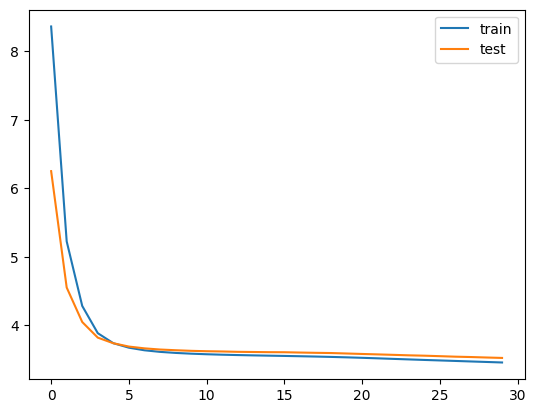

In [ ]:


# Visualizing training and validation loss
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# Define a start token (this should be unique and not in your vocab)
start_token = 1

# Create decoder input sequences
x_train_decoder = np.zeros((y_train.shape[0], max_len_highlight))  # Initialize with zeros
for i in range(len(y_train)):
    # Shift the target sequence by one and prepend the start token
    x_train_decoder[i, 0] = start_token  # Start token
    x_train_decoder[i, 1:] = y_train[i][:-1]  # All but the last token


hyperparameter tuning

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming cleaned_body and cleaned_highlights are your features and labels
texts = cleaned_body  # Your text input
labels = cleaned_highlight # Your text output

# Step 1: Tokenization
tokenizer = Tokenizer(num_words=20000)  # Adjust the num_words as necessary
tokenizer.fit_on_texts(texts)

# Step 2: Convert texts to sequences
x_train_sequences = tokenizer.texts_to_sequences(texts)
y_train_sequences = tokenizer.texts_to_sequences(labels)

# Step 3: Padding sequences to ensure uniform length
max_length = max(len(seq) for seq in x_train_sequences)  # Adjust max length as needed
x_train_padded = pad_sequences(x_train_sequences, maxlen=max_length, padding='post')
y_train_padded = pad_sequences(y_train_sequences, maxlen=max_length, padding='post')

# Check the shape of your padded sequences
print(x_train_padded.shape, y_train_padded.shape)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(labels)  # This will give you integer labels

# If you need one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train_encoded)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(labels)  # This will give you integer labels

# If you need one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train_encoded)


(8049, 23335) (8049, 23335)


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras_tuner import Hyperband

# Sample data for demonstration
# Replace this with your actual cleaned data
cleaned_body = [
    "This is an example text.",
    "Another example of text data.",
    "More examples for training."
] * 2683  # This will create 8049 entries in total

cleaned_highlights = [
    "Example highlight 1.",
    "Example highlight 2.",
    "Example highlight 3."
] * 2683  # This will create 8049 entries in total

# Step 1: Tokenization
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(cleaned_body)

# Step 2: Convert texts to sequences
x_train_sequences = tokenizer.texts_to_sequences(cleaned_body)
y_train_sequences = tokenizer.texts_to_sequences(cleaned_highlights)

# Step 3: Padding sequences to ensure uniform length
max_length = max(len(seq) for seq in x_train_sequences)  # Use the maximum length from your sequences
x_train_padded = pad_sequences(x_train_sequences, maxlen=max_length, padding='post')
y_train_padded = pad_sequences(y_train_sequences, maxlen=max_length, padding='post')

# Check the shape of your padded sequences
print("Padded Sequences Shape:", x_train_padded.shape, y_train_padded.shape)

# Step 4: Encoding Labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(cleaned_highlights)

# Step 5: One-hot encoding for multi-class classification
y_train_one_hot = to_categorical(y_train_encoded)

# Step 6: Define a function to build your model
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=20000, output_dim=hp.Int('embedding_dim', min_value=16, max_value=128, step=16), input_length=max_length))
    model.add(LSTM(hp.Int('units', min_value=32, max_value=256, step=32), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(hp.Int('units_2', min_value=32, max_value=256, step=32)))
    model.add(Dropout(0.2))
    model.add(Dense(y_train_one_hot.shape[1], activation='softmax'))  # Change the activation according to your use case
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 7: Hyperparameter tuning
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='hyperband_dir',
    project_name='text_generation'
)

# Step 8: Fit the tuner
tuner.search(x_train_padded, y_train_one_hot, epochs=10, validation_split=0.2)

# Step 9: Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print("Embedding Dim:", best_hyperparameters.get('embedding_dim'))
print("LSTM Units:", best_hyperparameters.get('units'))
print("LSTM Units 2:", best_hyperparameters.get('units_2'))


Trial 30 Complete [00h 00m 24s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 06m 00s
Best Hyperparameters:
Embedding Dim: 16
LSTM Units: 160
LSTM Units 2: 96


In [ ]:
reverse_target_word_index=y_tok.index_word
reverse_source_word_index=x_tok.index_word
target_word_index=y_tok.word_index


interference stage

In [ ]:
# Define Encoder Inference Model
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h3, state_c3])

# Define Decoder Inference Model
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(None, latent_dim))

# Reuse layers from training
dec_emb2 = dec_emb_layer(decoder_inputs)
decoder_outputs2, state_h2, state_c2 = decoder_lstm(
    dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c]
)

attn_out_inf = attention([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1)([decoder_outputs2, attn_out_inf])
decoder_outputs2 = decoder_dense(decoder_inf_concat)

decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2]
)

# Function to Decode Sequences
def decode_sequence(input_seq):
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index.get(sampled_token_index, 'UNK')

        if sampled_token == 'end' or len(decoded_sentence.split()) >= max_len_highlight - 1:
            stop_condition = True
        else:
            decoded_sentence += ' ' + sampled_token

        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index
        e_h, e_c = h, c

    return decoded_sentence.strip()


In [ ]:
import numpy as np

# Function to preprocess a new input sequence (tokenize and pad)
def preprocess_input_sequence(input_text, tokenizer, max_len_input):
    input_seq = tokenizer.texts_to_sequences([input_text])
    input_seq = pad_sequences(input_seq, maxlen=max_len_input, padding='post')
    return input_seq

# Function to generate a decoded sequence
def generate_text(input_text, max_len_input, max_len_output, tokenizer_source, tokenizer_target):
    # Preprocess the input text
    input_seq = preprocess_input_sequence(input_text, tokenizer_source, max_len_input)

    # Get the encoder's output and hidden states
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Initialize the target sequence with the <start> token
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        # Predict the next token
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Get the token index with the highest probability
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index.get(sampled_token_index, 'UNK')

        # If the <end> token is generated or the maximum length is reached, stop
        if (sampled_token == 'end' or len(decoded_sentence.split()) >= max_len_output - 1):
            stop_condition = True
        else:
            # Append the sampled token to the decoded sentence
            decoded_sentence += ' ' + sampled_token

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update the internal states
        e_h, e_c = h, c

    return decoded_sentence.strip()



In [ ]:
def seq2highlights(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

In [ ]:
def seq2summary(sequence, reverse_word_index):
    """
    Converts a sequence of integers into a human-readable summary (string of words).

    Args:
        sequence (list or numpy array): The target sequence of integers.
        reverse_word_index (dict): A dictionary mapping integer indices to words.

    Returns:
        str: The summary in text form.
    """
    return ' '.join([reverse_word_index.get(i, 'UNK') for i in sequence if i != 0 and i != target_word_index['end']])


reference = []
hypothesis = []
for i in range(10):
    print("Highlights:")
    # Use reverse_target_word_index instead of reverse_word_index
    print(seq2summary(y_test[i], reverse_target_word_index))
    reference.append(seq2highlights(y_test[i]))
    print("\n")
    print("Predicted summary:")
    print(decode_sequence(x_test[i].reshape(1, max_len_body)))
    hypothesis.append(decode_sequence(x_test[i].reshape(1, max_len_body)))
    print("\n")
    print("\n")

Highlights:
start reaction profiles of proton and hydride transfer mechanisms were generated dispersioncorrected density functional theory methods were employed waterassisted polar nucleophilic mechanism was investigated for the first time waterassisted polar nucleophilic mechanism is not a favorable path hydride transfer mechanism is more plausible than proton transfer


Predicted summary:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/st

displaying results

In [ ]:
from rouge import Rouge


score = Rouge()


score.get_scores(hypothesis, reference, avg = True)

{'rouge-1': {'r': 0.07188722010703434,
  'p': 0.5000000000000001,
  'f': 0.12555447161993105},
 'rouge-2': {'r': 0.006521739130434782,
  'p': 0.03333333333333333,
  'f': 0.010909090361652926},
 'rouge-l': {'r': 0.06537461506501754,
  'p': 0.4600000000000001,
  'f': 0.11436566043111988}}